In [1]:
#Importing the matrix exponentiation function
from scipy.linalg import expm, logm
#Importing constants
import scipy.constants as const
#Numpy
import numpy as np
#Plotting
import matplotlib
import matplotlib.pyplot as plt

#Method for calculating partial trace
## https://www.peijun.me/reduced-density-matrix-and-partial-trace.html

/home/niall/.local/lib/python3.10/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)
/home/niall/.local/lib/python3.10/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:836: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


(0.0, 0.1)

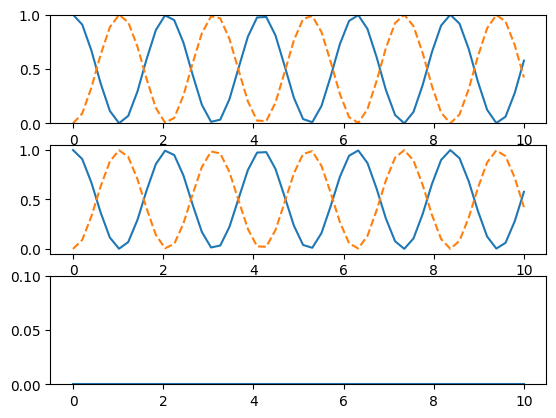

In [2]:
#Evolution of 4 basis states for 2 independent systems
n1 = 2
n2 = 2

reduced_density_matrix_a = lambda rho_tensor: np.trace(rho_tensor, axis1=1, axis2=3) #rho_a
reduced_density_matrix_b = lambda rho_tensor: np.trace(rho_tensor, axis1=0, axis2=2) #rho_b

#diagonal (c_00 + c_01)

#Let's define some useful matrices
hadamard = (1/np.sqrt(2))*np.array([[1, 1],[1, -1]])
identity = np.array([[1, 0],[0, 1]])

#Let's take the following two Hamiltonians for two independent qubits
hamiltonian_a = np.array([[0, 1.5],[1.5, 0]])
hamiltonian_b = np.array([[0, 1.5],[1.5, 0]])
eig_values_a, eig_vectors_a = np.linalg.eig(hamiltonian_a)
eig_values_b, eig_vectors_b = np.linalg.eig(hamiltonian_b)
#Now form the kronecker product
hamiltonian_total_indep = np.kron(hamiltonian_a, identity) + np.kron(identity, hamiltonian_b)

#What are the initial states for each system? arr = arr[..., None]
initial_state_a = np.matmul(identity, np.array([[1],[0]]))#eig_vectors_a[:,0].reshape(-1,1))
initial_state_b = np.matmul(identity, np.array([[1],[0]]))#eig_vectors_b[:,0].reshape(-1,1))
#Initial state in combined system
initial_state_total = np.kron(initial_state_a, initial_state_b)

#Define the evolution operator function with hbar = 1
def evolutionOperator(hamiltonian, time):
  return expm(-1j*hamiltonian*time)

#Probability of measuring each state
projector_00 = np.array([[1,0,0,0]])
projector_01 = np.array([[0,1,0,0]])
projector_10 = np.array([[0,0,1,0]])
projector_11 = np.array([[0,0,0,1]])
prob_measure_0_a = lambda state: np.abs(np.matmul(projector_00, state)[0][0])**2 + np.abs(np.matmul(projector_01, state)[0][0])**2
prob_measure_1_a = lambda state: np.abs(np.matmul(projector_10, state)[0][0])**2 + np.abs(np.matmul(projector_11, state)[0][0])**2
prob_measure_0_b = lambda state: np.abs(np.matmul(projector_00, state)[0][0])**2 + np.abs(np.matmul(projector_10, state)[0][0])**2
prob_measure_1_b = lambda state: np.abs(np.matmul(projector_01, state)[0][0])**2 + np.abs(np.matmul(projector_11, state)[0][0])**2

#Von Neumann Entropy
von_neumann_entropy = lambda density_matrix: (-1)*np.trace(np.matmul(density_matrix,logm(density_matrix)))

#Create figure
fig_indep       = plt.figure()
ax_indep_a      = fig_indep.add_subplot(311)
ax_indep_b      = fig_indep.add_subplot(312)
ax_indep_c      = fig_indep.add_subplot(313)
time = np.linspace(0,10,50)

prob_0_a = []
prob_1_a = []
prob_0_b = []
prob_1_b = []

prob_00 = []
prob_01 = []
prob_10 = []
prob_11 = []
entanglement_entropy = []

for current_time in time:
  current_state = np.matmul(evolutionOperator(hamiltonian_total_indep, current_time), initial_state_total)
  density_matrix = np.matmul(current_state, np.transpose(np.conjugate(current_state)))
  rho_tensor=density_matrix.reshape([n1, n2, n1, n2]);
  entanglement_entropy.append(np.abs(von_neumann_entropy(reduced_density_matrix_a(rho_tensor))))
  prob_0_a.append(prob_measure_0_a(current_state))
  prob_1_a.append(prob_measure_1_a(current_state))
  prob_0_b.append(prob_measure_0_b(current_state))
  prob_1_b.append(prob_measure_1_b(current_state))
  prob_00.append(np.abs(np.matmul(projector_00, current_state)[0][0])**2)
  prob_01.append(np.abs(np.matmul(projector_01, current_state)[0][0])**2)
  prob_10.append(np.abs(np.matmul(projector_10, current_state)[0][0])**2)
  prob_11.append(np.abs(np.matmul(projector_11, current_state)[0][0])**2)

#Spacing
ax_indep_a.plot(time, prob_0_a)
ax_indep_a.plot(time, prob_1_a, '--')
ax_indep_b.plot(time, prob_0_b)
ax_indep_b.plot(time, prob_1_b, '--')
ax_indep_a.set_ylim([0,1])

#ax_indep_a.plot(time, prob_00)
#ax_indep_a.plot(time, prob_01)
#ax_indep_a.plot(time, prob_10)
#ax_indep_a.plot(time, prob_11)
ax_indep_c.plot(time, entanglement_entropy)
ax_indep_c.set_ylim([0,0.1])

[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.    0.  ]
 [ 0.    0.   -0.25  0.  ]
 [ 0.    0.    0.    0.25]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[5.02566901e-01-0.50013647j]
 [1.32467908e-16-0.00171689j]
 [4.21648129e-17-0.00171689j]
 [4.97427163e-01+0.49985032j]]
[[ 4.66486926e-01-0.51246789j]
 [-3.94454657e-17-0.15082819j]
 [-6.22166675e-17-0.15082819j]
 [ 4.86598334e-01+0.48732986j]]


/home/niall/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/niall/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


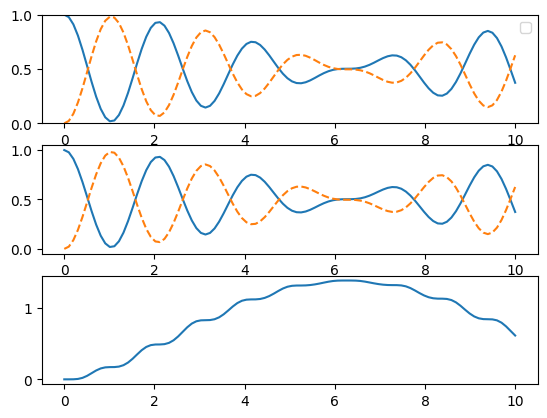

In [3]:
#Evolution of 4 basis states for 2 interdependent systems
n1 = 2
n2 = 2

reduced_density_matrix_a = lambda rho_tensor: np.trace(rho_tensor, axis1=1, axis2=3) #rho_a
reduced_density_matrix_b = lambda rho_tensor: np.trace(rho_tensor, axis1=0, axis2=2) #rho_b

#Let's define some useful matrices
hadamard = (1/np.sqrt(2))*np.array([[1, 1],[1, -1]])
identity = np.array([[1, 0],[0, 1]])

#Let's take the following two Hamiltonians for two independent qubits
hamiltonian_a   = np.array([[0, 1.5],[1.5, 0]])
hamiltonian_b   = np.array([[0, 1.5],[1.5, 0]])
hamiltonian_int = np.matmul(np.kron((1/2)*np.array([[1,0],[0,-1]]), identity), np.kron(identity, (1/2)*np.array([[1,0],[0,-1]])))
print(hamiltonian_int)
eig_values_a, eig_vectors_a = np.linalg.eig(hamiltonian_a)
eig_values_b, eig_vectors_b = np.linalg.eig(hamiltonian_b)
#Now form the kronecker product
hamiltonian_total_indep = np.kron(hamiltonian_a, identity) + np.kron(identity, hamiltonian_b) + hamiltonian_int

#What are the initial states for each system? arr = arr[..., None]
initial_state_a = np.matmul(identity, np.array([[1],[0]]))#eig_vectors_a[:,0].reshape(-1,1))
initial_state_b = np.matmul(identity, np.array([[1],[0]]))#eig_vectors_b[:,0].reshape(-1,1))
#Initial state in combined system
initial_state_total = np.kron(initial_state_a, initial_state_b)

#Define the evolution operator function with hbar = 1
def evolutionOperator(hamiltonian, time):
  return expm(-1j*hamiltonian*time)

#Probability of measuring each state
projector_00 = np.array([[1,0,0,0]])
projector_01 = np.array([[0,1,0,0]])
projector_10 = np.array([[0,0,1,0]])
projector_11 = np.array([[0,0,0,1]])
prob_measure_0_a = lambda state: np.abs(np.matmul(projector_00, state)[0][0])**2 + np.abs(np.matmul(projector_01, state)[0][0])**2
prob_measure_1_a = lambda state: np.abs(np.matmul(projector_10, state)[0][0])**2 + np.abs(np.matmul(projector_11, state)[0][0])**2
prob_measure_0_b = lambda state: np.abs(np.matmul(projector_00, state)[0][0])**2 + np.abs(np.matmul(projector_10, state)[0][0])**2
prob_measure_1_b = lambda state: np.abs(np.matmul(projector_01, state)[0][0])**2 + np.abs(np.matmul(projector_11, state)[0][0])**2

#Von Neumann Entropy
von_neumann_entropy = lambda density_matrix: (-1)*np.trace(np.matmul(density_matrix,logm(density_matrix)))

#Create figure
fig_indep       = plt.figure()
ax_indep_a      = fig_indep.add_subplot(311)
ax_indep_b      = fig_indep.add_subplot(312)
ax_indep_c      = fig_indep.add_subplot(313)
time = np.linspace(0,10,100)

prob_0_a = []
prob_1_a = []
prob_0_b = []
prob_1_b = []

prob_00 = []
prob_01 = []
prob_10 = []
prob_11 = []
entanglement_entropy = []

relative_entropy = []

for current_time in time:
  current_state = np.matmul(evolutionOperator(hamiltonian_total_indep, current_time), initial_state_total)
  if((current_time > 6.2) & (current_time < 6.4)):
    print(current_state)
  density_matrix = np.matmul(current_state, np.transpose(np.conjugate(current_state)))
  rho_tensor=density_matrix.reshape([n1, n2, n1, n2]);
  entanglement_entropy.append(von_neumann_entropy(reduced_density_matrix_a(rho_tensor)))
  relative_entropy.append(von_neumann_entropy(reduced_density_matrix_a(rho_tensor)) + von_neumann_entropy(reduced_density_matrix_b(rho_tensor)) - von_neumann_entropy(density_matrix))
  prob_0_a.append(prob_measure_0_a(current_state))
  prob_1_a.append(prob_measure_1_a(current_state))
  prob_0_b.append(prob_measure_0_b(current_state))
  prob_1_b.append(prob_measure_1_b(current_state))
  prob_00.append(np.abs(np.matmul(projector_00, current_state)[0][0])**2)
  prob_01.append(np.abs(np.matmul(projector_01, current_state)[0][0])**2)
  prob_10.append(np.abs(np.matmul(projector_10, current_state)[0][0])**2)
  prob_11.append(np.abs(np.matmul(projector_11, current_state)[0][0])**2)


#(QMI) Relative Entropy = S(rho_a) + S(rho_b) - S(rho_ab)

ax_indep_a.plot(time, prob_0_a)
ax_indep_a.plot(time, prob_1_a, '--')
ax_indep_b.plot(time, prob_0_b)
ax_indep_b.plot(time, prob_1_b, '--')
ax_indep_a.set_ylim([0,1])

#ax_indep_a.plot(time, prob_00, label="P(00)")
#ax_indep_a.plot(time, prob_01, label="P(01)")
#ax_indep_a.plot(time, prob_10, label="P(10)")
#ax_indep_a.plot(time, prob_11, label="P(11)")
ax_indep_a.legend()
ax_indep_c.plot(time, relative_entropy)
#ax_indep_b.set_ylim([0,0.1])